## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results,on=["Mouse ID"])

# Display the data table for preview
mouse_study_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
#Checking the number of mice.
mice_count = len(mouse_study_complete["Mouse ID"].unique())
print(mice_count)

249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicaterows = mouse_study_complete.duplicated(subset="Mouse ID", keep='first')
print(duplicaterows)

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# instructor note: use loc with result of previous cell




In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates_dropped = mouse_study_complete.drop_duplicates(subset = "Mouse ID", keep='first')

#make it a dataframe. 
mouse_study_no_duplicates=pd.DataFrame(duplicates_dropped)
mouse_study_no_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
mice_count_no_duplicates = len(mouse_study_no_duplicates["Mouse ID"].unique())
print(mice_count_no_duplicates)

249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_volume_complete = mouse_study_no_duplicates.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_volume_complete = mouse_study_no_duplicates.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

#variance 
var_volume_complete = mouse_study_no_duplicates.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

#standard deviation 
std_volume_complete = mouse_study_no_duplicates.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

#SEM 
sem_volume_complete = mouse_study_no_duplicates.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
complete_volume_df = pd.DataFrame({"Mean": mean_volume_complete,
                              "Median": median_volume_complete,
                              "Variance": var_volume_complete,
                              "Standard Deviation": std_volume_complete,
                              "SEM": sem_volume_complete})

complete_volume_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
complete_volume_df.groupby(["Drug Regimen"]).agg(["mean", "median", "var","std","sem"])


Mean                    Median                     ...  \
              mean median var std sem   mean median var std sem  ...   
Drug Regimen                                                     ...   
Capomulin     45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Ceftamin      45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Infubinol     45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Ketapril      45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Naftisol      45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Placebo       45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Propriva      45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Ramicane      45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Stelasyn      45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   
Zoniferol     45.0   45.0 NaN NaN NaN   45.0   45.0 NaN NaN NaN  ...   

             Standard Deviation                     SEM                     
                           mean median var std sem mean median var std sem  
Drug Regimen                                                                
Capomulin                   0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Ceftamin                    0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Infubinol                   0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Ketapril                    0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Naftisol                    0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Placebo                     0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Propriva                    0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Ramicane                    0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Stelasyn                    0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  
Zoniferol                   0.0    0.0 NaN NaN NaN  0.0    0.0 NaN NaN NaN  

[10 rows x 25 columns]

## Bar and Pie Charts

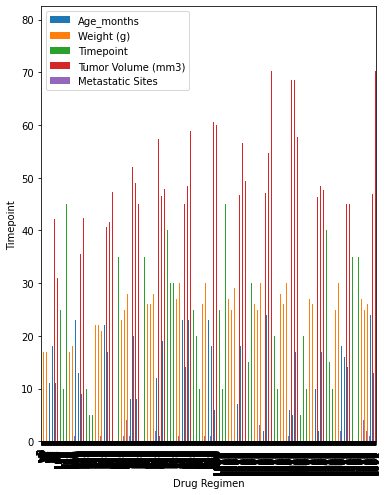

<Figure size 432x288 with 0 Axes>

In [13]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#matplotlib Day 2 Act. 4 

drug_regimen = mouse_study_complete.groupby("Drug Regimen")

count_timepoints= drug_regimen["Timepoint"].count()

count_chart = mouse_study_complete.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Timepoint")

plt.show()
plt.tight_layout()




Text(0, 0.5, 'Drug Regimen')

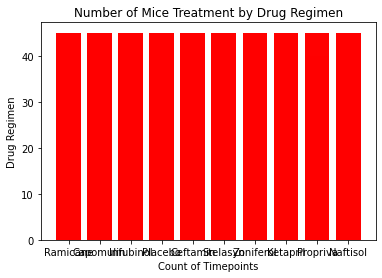

In [14]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint=mouse_study_complete["Timepoint"]
x_axis =mouse_study_complete["Drug Regimen"]
plt.bar(x_axis, timepoint, color='r', alpha=0.5, align="center")

# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0, max(timepoint)+5000)

plt.title("Number of Mice Treatment by Drug Regimen")
plt.xlabel("Count of Timepoints")
plt.ylabel("Drug Regimen")


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Day 2 activity 5
#this activity didn't seem helpful. What is this method? 

([<matplotlib.patches.Wedge at 0x7fe77b760a90>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Females'),
  Text(0.690856410575595, 0.8559891471079556, 'Males')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

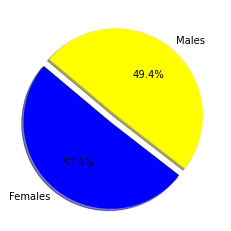

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Day 1 activity 9 
# 
values = mouse_study_complete.value_counts("Sex")
labels= ["Females", "Males"]
colors = ["blue", "yellow"]
explode = (0.1,0)
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
 

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

#Group by drug regimen 
adjusted_mouse_data = mouse_study_complete.groupby("Mouse ID")["Timepoint"].max()

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
another_adjusted_mouse_data = pd.merge(mouse_study_complete,adjusted_mouse_data,on=["Mouse ID"])

#Reset the index 
setting_index = another_adjusted_mouse_data.set_index("Drug Regimen")
setting_index


,Mouse ID,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
Drug Regimen,,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0,45
Ramicane,k403,Male,21,16,5,38.825898,0,45
Ramicane,k403,Male,21,16,10,35.014271,1,45
Ramicane,k403,Male,21,16,15,34.223992,1,45
Ramicane,k403,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2,45
Naftisol,z969,Male,9,30,30,65.841013,3,45
Naftisol,z969,Male,9,30,35,69.176246,4,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR
tumor_volume = another_adjusted_mouse_data["Tumor Volume (mm3)"]
quartiles= tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = lowerq-upperq

print(f"The lower quartile of tumor vol data is: {lowerq}")
print(f"The upper quartile of tumor vol data is: {upperq}")
print(f"The interquartile range of tumor vol data is: {iqr}")
print(f"The the median of tumor vol data is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
# matplotlib day 3 activity 2
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of tumor vol data is: 45.0
The upper quartile of tumor vol data is: 56.29220039
The interquartile range of tumor vol data is: -11.292200389999998
The the median of tumor vol data is: 48.95147442 
Values below 61.93830058499999 could be outliers.
Values above 39.353899805 could be outliers.


TypeError: object of type 'numpy.int64' has no len()

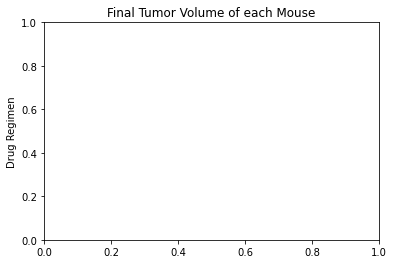

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# I reran it and times is not defined 

sum_tumor_volume = mouse_study_complete["Tumor Volume (mm3)"].count()

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of each Mouse")
ax1.set_ylabel("Drug Regimen")
ax1.boxplot(sum_tumor_volume)
plt.show()

## Line and Scatter Plots

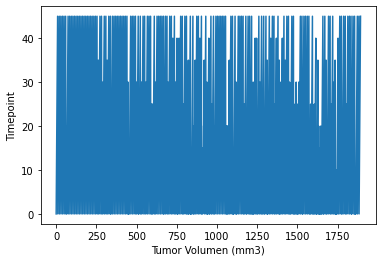

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## use loc to filter data down to a specific mouse and the treatment Capomulin
# group_by_line_plot = setting_index.groupby(["Mouse ID"])

# line_plot_variable = setting_index.loc["Capomulin"]
# line_plot_variable

# line_plot_variable = setting_index.loc["Capomulin", "s185"]

mouse_study_complete["Timepoint"].plot.line()
plt.xlabel("Tumor Volumen (mm3)")
plt.ylabel("Timepoint")
plt.show()

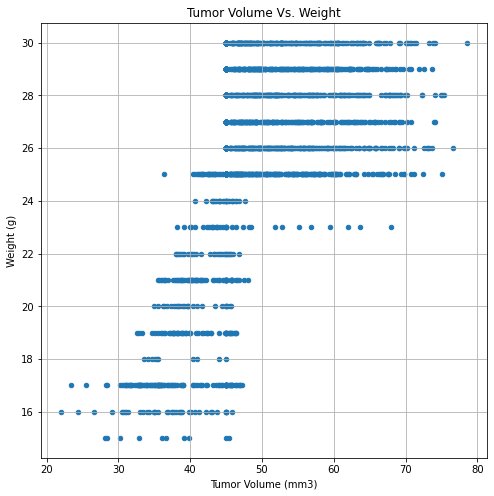

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# same loc as above but second data point is an Average from the filtered data.
# formula from matplotlib Day 2 activity 6 
mouse_study_complete.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(8,8), title="Tumor Volume Vs. Weight")
plt.show()

## Correlation and Regression

In [ ]:
#Reject comments and attempt to do this 

#Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
## matplotlib day 3 activity 6+

# #formula for coefficent from day 3 activity 6 - need updating 
#unsure what information to add to the iloc. Description above seems like it needs to be formulas 
# mouse_weight = mouse_study_complete.iloc[:,1]
# tumor_volume = mouse_study_complete.iloc[:,3]
# correlation = st.pearsonr(mouse_weight,tumor_volume)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

# # #formula for linear regression from day 3 activity 7 - need updating 
# # # Add the linear regression equation and line to plot
# # x_values = san_diego_housing['AveRooms']
# y_values = san_diego_housing['MEDV']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
# plt.show()


TypeError: unsupported operand type(s) for +: 'float' and 'str'